# Data Science Regression Project: Predicting Home Prices in Banglore

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Data Load: Load banglore home prices into a dataframe

In [2]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df1['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [6]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

<AxesSubplot:ylabel='area_type'>

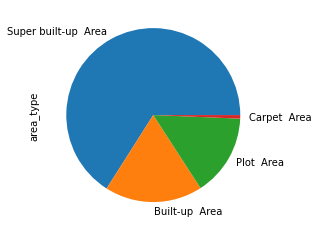

In [7]:
df1['area_type'].value_counts().plot.pie()

### Drop features that are not required to build our model

In [8]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis='columns')
df2.shape

(13320, 5)

### Data Cleaning: Handle NA values

In [9]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df2.isnull().sum()/df2.shape[0]

location      0.000075
size          0.001201
total_sqft    0.000000
bath          0.005480
price         0.000000
dtype: float64

In [11]:
df3=df2.dropna()
df3.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df3['size'].values

array(['2 BHK', '4 Bedroom', '3 BHK', ..., '2 BHK', '4 BHK', '1 BHK'],
      dtype=object)

In [13]:
df3['size'].value_counts()

2 BHK         5198
3 BHK         4286
4 Bedroom      818
4 BHK          577
3 Bedroom      546
1 BHK          531
2 Bedroom      329
5 Bedroom      296
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           57
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 Bedroom       1
16 BHK           1
19 BHK           1
18 Bedroom       1
Name: size, dtype: int64

### Feature Engineering
#### Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [14]:
def split_space(x):
    return x.split(' ')[0]
    
df3['bhk']=df3['size'].apply(split_space)

In [15]:
df3['bhk'].values

array(['2', '4', '3', ..., '2', '4', '1'], dtype=object)

In [16]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [17]:
df3['total_sqft'][990]

'633 - 666'

In [18]:
df3['total_sqft'][999]

'2112.95'

In [19]:
df3['total_sqft'][0]

'1056'

In [20]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True    

In [21]:
x990= df3['total_sqft'][990]
bool_x990=is_float(x990)
bool_x990

False

In [22]:
df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [23]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


#### Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

In [24]:
def convert_total_sqft_to_number(x):
    token = x.split(' - ')
    if len(token) == 2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [25]:
test1='200 - 300'
convert_total_sqft_to_number(test1)

250.0

In [26]:
test2='34Sq. Meter'
convert_total_sqft_to_number(test2)

In [27]:
df4=df3.copy()

In [28]:
df4['total_sqft']=df4['total_sqft'].apply(convert_total_sqft_to_number)
df4.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [29]:
df3['total_sqft'][410]

'34.46Sq. Meter'

In [30]:
df4['total_sqft'][410]

nan

In [31]:
df4.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
price            18.5
bhk                 1
Name: 410, dtype: object

In [32]:
df4.isna().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [33]:
df4=df4.dropna()

In [34]:
df4.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
dtype: int64

### Feature Engineering
#### Add new feature called price per square feet

In [35]:
df5=df4.copy()

In [36]:
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']

In [37]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [38]:
len(df5.location.unique())

1298

In [39]:
location_stats=df5.location.value_counts()

In [40]:
location_stats.head(15)

Whitefield                  532
Sarjapur  Road              392
Electronic City             302
Kanakpura Road              264
Thanisandra                 232
Yelahanka                   210
Uttarahalli                 186
Hebbal                      176
Marathahalli                175
Raja Rajeshwari Nagar       171
Bannerghatta Road           151
Hennur Road                 150
7th Phase JP Nagar          148
Haralur Road                141
Electronic City Phase II    131
Name: location, dtype: int64

In [41]:
len(location_stats[location_stats>10])

240

### Dimensionality Reduction
##### Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [42]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Ganga Nagar                  10
Nagappa Reddy Layout         10
Naganathapura                10
Sadashiva Nagar              10
Basapura                     10
                             ..
Indiranagar HAL 2nd Stage     1
Maruthi HBCS Layout           1
K R C kothanur                1
1Channasandra                 1
Abshot Layout                 1
Name: location, Length: 1058, dtype: int64

In [43]:
df5.location = df5.location.apply(lambda x : 'other' if x in location_stats_less_than_10 else x)

In [44]:
len(df5.location.unique())

241

### Lets remove some outliers

In [45]:
df5.dtypes

location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                object
price_per_sqft    float64
dtype: object

In [46]:
df5.bhk=df5.bhk.apply(lambda x: float(x))

In [47]:
ration_total_sqft_bhk=df5.total_sqft/df5.bhk

<AxesSubplot:ylabel='Frequency'>

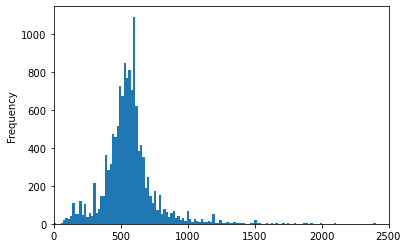

In [48]:
ration_total_sqft_bhk.plot.hist(bins=1500, xlim=(0,2500))

In [49]:
ration_total_sqft_bhk.describe()

count    13200.000000
mean       573.847262
std        388.079980
min          0.250000
25%        473.000000
50%        552.000000
75%        625.000000
max      26136.000000
dtype: float64

<AxesSubplot:>

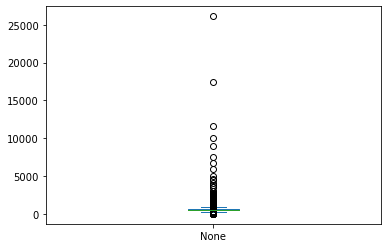

In [50]:
ration_total_sqft_bhk.plot.box()

<AxesSubplot:>

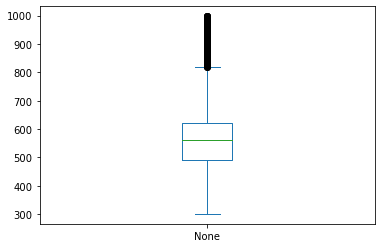

In [51]:
ration_total_sqft_bhk[((df5.total_sqft/df5.bhk)>300)&((df5.total_sqft/df5.bhk)<1000)].plot.box()

In [52]:
df5.shape

(13200, 7)

In [53]:
 df6=df5[((df5.total_sqft/df5.bhk)>300)&((df5.total_sqft/df5.bhk)<1000)]

In [54]:
df6.shape

(11830, 7)

   #### Visualisation of some distribution of price per sqft per a specified location

<Figure size 432x288 with 0 Axes>

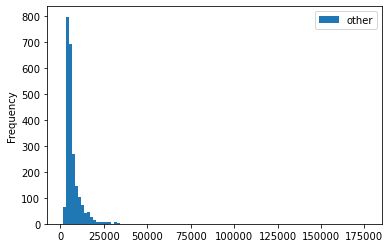

<Figure size 432x288 with 0 Axes>

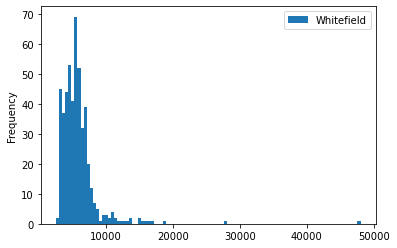

<Figure size 432x288 with 0 Axes>

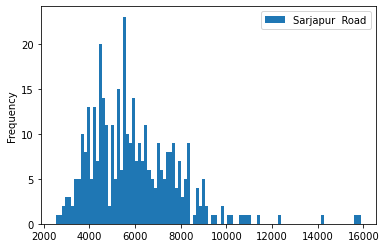

<Figure size 432x288 with 0 Axes>

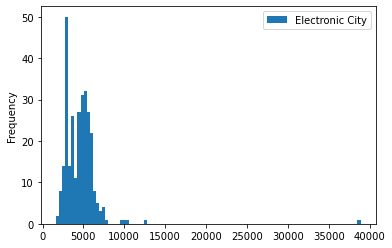

<Figure size 432x288 with 0 Axes>

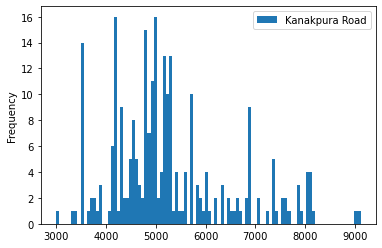

<Figure size 432x288 with 0 Axes>

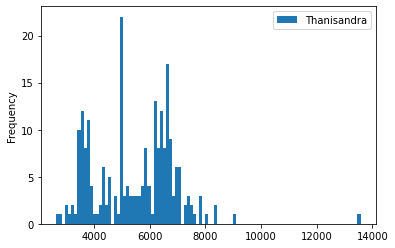

<Figure size 432x288 with 0 Axes>

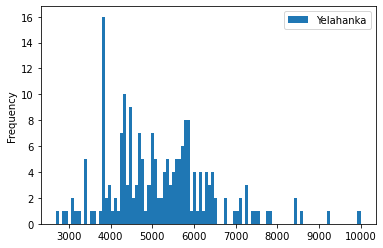

<Figure size 432x288 with 0 Axes>

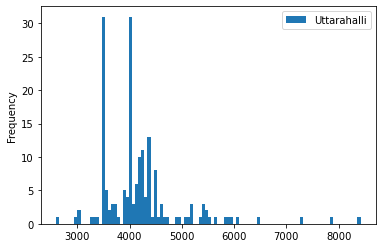

<Figure size 432x288 with 0 Axes>

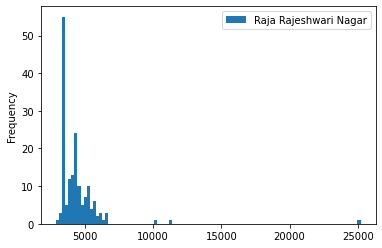

<Figure size 432x288 with 0 Axes>

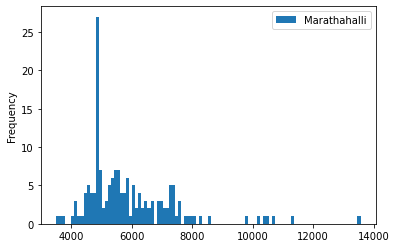

<Figure size 432x288 with 0 Axes>

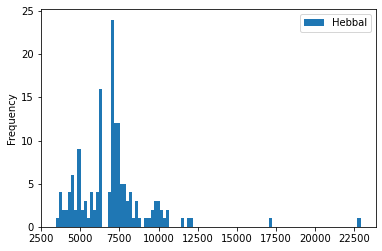

<Figure size 432x288 with 0 Axes>

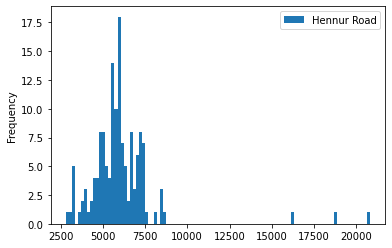

<Figure size 432x288 with 0 Axes>

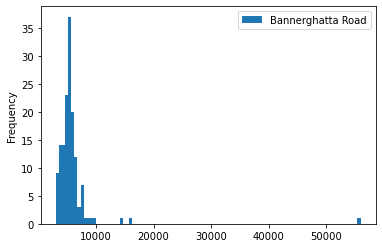

<Figure size 432x288 with 0 Axes>

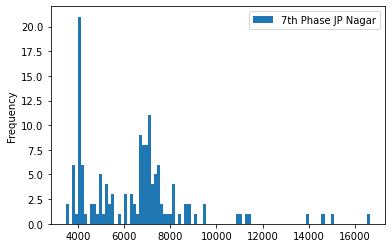

<Figure size 432x288 with 0 Axes>

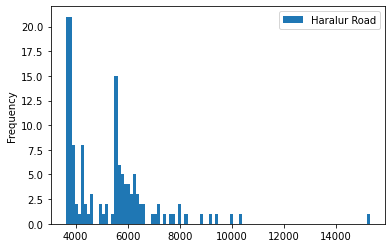

<Figure size 432x288 with 0 Axes>

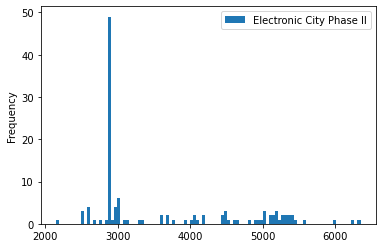

In [55]:
dd=df6.location.value_counts()>100
location_100=[]
i=0

for bool_dd in dd:
    if bool_dd==True:
        location_100.append(dd.index[i])
    i=i+1

price=list(df6['price_per_sqft'])
for loc in location_100:
    price_per_sqft_per_loc=[]
    j=0
    for location_df in df6['location']:
        if location_df == loc:
            price_per_sqft_per_loc.append(price[j])
        j=j+1
    plt.figure()
    price_df=pd.DataFrame(price_per_sqft_per_loc, columns=[loc])
    price_df.plot.hist(bins=100)
            
            

    

### Outlier Removal Using Standard Deviation and Mean

In [56]:
df6.price_per_sqft.describe()

count     11830.000000
mean       6069.451868
std        3852.857244
min         500.000000
25%        4189.596541
50%        5214.403583
75%        6696.579053
max      176470.588235
Name: price_per_sqft, dtype: float64

##### Here we find that min price per sqft is 500 rs/sqft whereas max is 176470, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation

In [57]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(9561, 7)

In [58]:
df7.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Devarachikkanahalli,3 BHK,1250.0,2.0,44.0,3.0,3520.000000
1,Devarachikkanahalli,2 BHK,1250.0,2.0,40.0,2.0,3200.000000
2,Devarachikkanahalli,2 Bedroom,1200.0,2.0,83.0,2.0,6916.666667
3,Devarachikkanahalli,2 BHK,1170.0,2.0,40.0,2.0,3418.803419
4,Devarachikkanahalli,3 BHK,1425.0,2.0,65.0,3.0,4561.403509


#####  Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like

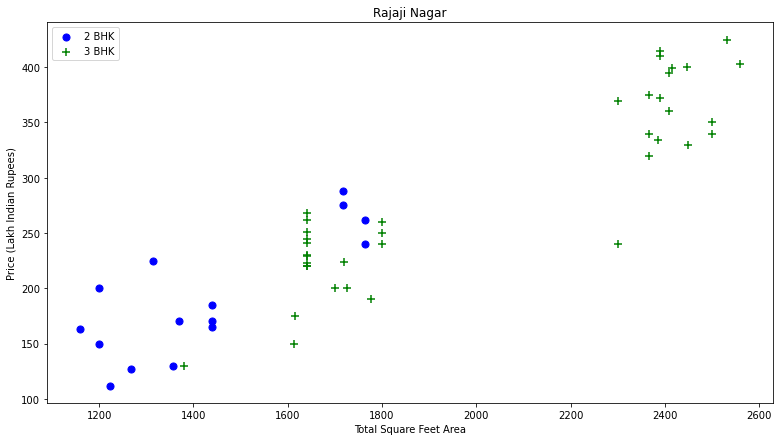

In [59]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    
    plt.figure(figsize=(13,7))
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

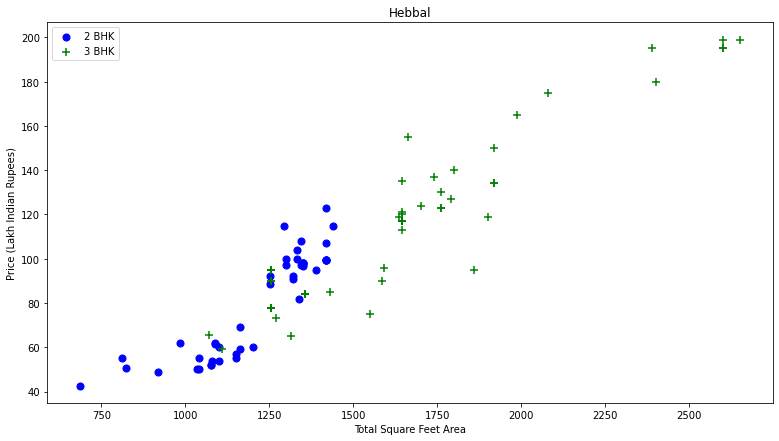

In [60]:
plot_scatter_chart(df7,"Hebbal")

##### We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}

##### Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment

In [61]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


In [62]:
df8 = remove_bhk_outliers(df7)
df8.shape

(6784, 7)

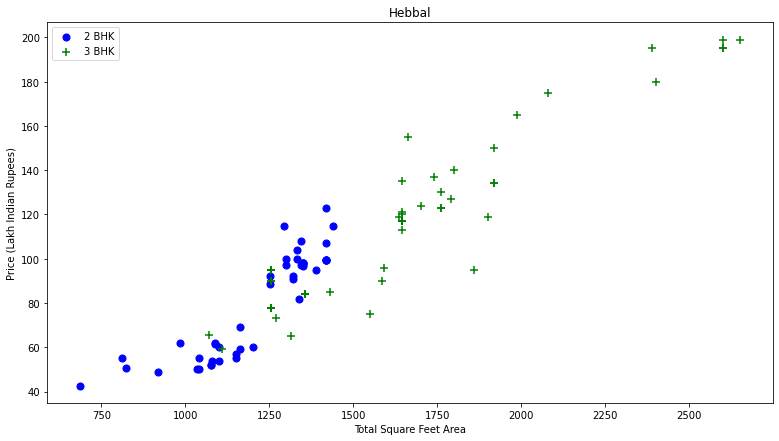

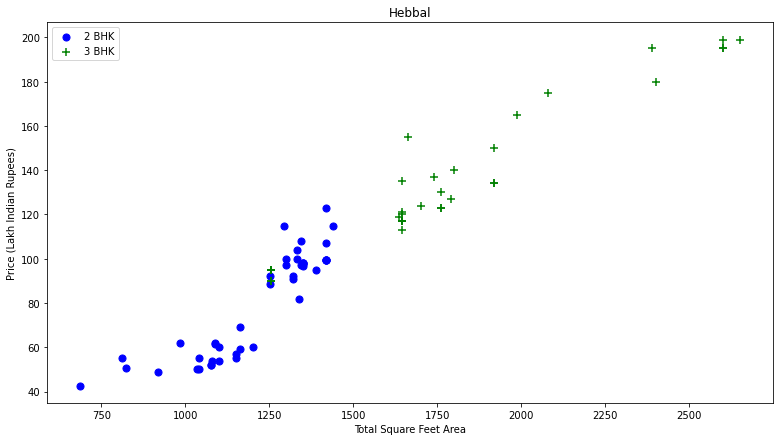

In [63]:
plot_scatter_chart(df7,"Hebbal")
plot_scatter_chart(df8,"Hebbal")

##### It is unusual to have 2 more bathrooms than number of bedrooms in a home

In [64]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1554,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4.0,3252.03252
6298,Thanisandra,3 BHK,1806.0,6.0,116.0,3.0,6423.03433


In [65]:
df9=df8[df8.bath<df8.bhk+2]

In [66]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2.0
2,Devarachikkanahalli,1200.0,2.0,83.0,2.0
3,Devarachikkanahalli,1170.0,2.0,40.0,2.0


In [67]:
pd.get_dummies(df10.location)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9551,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9553,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [68]:
dumies = pd.get_dummies(df10.location)

In [69]:
df11 = pd.concat([df10,dumies.drop('other',axis='columns')], axis='columns')

In [70]:
df11.head(5)

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devarachikkanahalli,1425.0,2.0,65.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Devarachikkanahalli,947.0,2.0,43.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
df12=df11.drop('location', axis=1)

In [72]:
df12.head(2)

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,40.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Build a Model Now...

In [73]:
X = df12.drop('price', axis=1)

In [74]:
y = df12.price

In [75]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=10)

In [76]:
from sklearn.linear_model import LinearRegression

lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8380652581111647

In [77]:
from sklearn.model_selection import cross_val_score

cross_val_score(LinearRegression(), X_train, y_train, cv=5)

array([ 8.65352452e-01, -3.52814979e+14,  8.53317422e-01,  8.44333927e-01,
        8.54845402e-01])

### Use K Fold cross validation to measure accuracy of our LinearRegression model

In [78]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2,random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.83294976, 0.85159853, 0.84007987, 0.83820965, 0.86103592])

In [79]:
mean_score=cross_val_score(LinearRegression(), X, y, cv=cv).mean()
mean_score

0.8447747476660459

##### We can see that in 5 iterations we get a score above 80% all the time. This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. We will use GridSearchCV for this purpose

### Find best model using GridSearchCV

In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score

In [81]:
preprocessor = make_pipeline(StandardScaler(), SelectKBest(f_regression, k=10))

In [82]:
RandomForest = make_pipeline(preprocessor, RandomForestRegressor(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostRegressor(n_estimators=100,random_state=0))
SVM = make_pipeline(preprocessor, SVR())
KNN = make_pipeline(preprocessor, KNeighborsRegressor())
Bagging=make_pipeline(preprocessor,BaggingRegressor(base_estimator=KNeighborsRegressor(),n_estimators=100))
DecisionTree=make_pipeline(preprocessor,DecisionTreeRegressor(random_state=0))
LogisticReg = make_pipeline(preprocessor,LogisticRegression())
LinearReg=make_pipeline(preprocessor,LinearRegression()) 

In [83]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [88]:
def find_best_model_using_gridsearchcv(X,y):
    
    algos = {
        'DecisionTree': {
            'model': DecisionTree,
            'params': {
                'decisiontreeregressor__criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                'decisiontreeregressor__splitter': ['best','random'],
                'decisiontreeregressor__max_features': ['auto', 'sqrt', 'log2'],
                'pipeline__selectkbest__k': [8,20,100,180,243]
            },
            'Gridsearchcv' : False
        },
         'SVM': {
            'model': SVM,
            'params': {
                'svr__gamma':['scale', 'auto'],
                'svr__C':[1, 10],
                'svr__kernel' : ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
                'svr__degree':[1, 2,],
                'pipeline__selectkbest__k': [8,20,100,180,243]
            },
            'Gridsearchcv' : False
        },
        'KNN': {
            'model': KNN,
            'params': { 
              'kneighborsregressor__n_neighbors': np.arange(1,20),
              'kneighborsregressor__weights':['uniform', 'distance'],
              'kneighborsregressor__algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'kneighborsregressor__metric': ['euclidean','manhattan','minkowski'],
              'pipeline__selectkbest__k': [8,20,100,180,243]
            },
            'Gridsearchcv' : False
        },
        
        'LinearReg' : {
            'model': LinearReg,
            'params': {
                'linearregression__normalize': [True, False],
                'pipeline__selectkbest__k': [8,20,100,180,243]
            },
            'Gridsearchcv' : False
        },
            
        'RandomForest': {
            'model': RandomForest,
            'params': {
            'randomforestregressor__max_depth':[i for i in range(4,13,2)],
            'randomforestregressor__min_samples_leaf':[5,7,10],
            'randomforestregressor__n_estimators':[10,50,250],
             'pipeline__selectkbest__k': [8,20,100,180,243]
                      },
            'Gridsearchcv' : False
             },
             
       'Bagging' : {
            'model': Bagging,
            'params': {
                'baggingregressor__base_estimator': [DecisionTreeRegressor(),
                                                [KNeighborsRegressor(n_neighbors=i) for i in range(4,21,4)],
                                                      SVR(),LogisticRegression()],
            
                'pipeline__selectkbest__k': [8,20,100,180,243]
                      },
            'Gridsearchcv' : False
        },
        'Boosting' : {
            'model': AdaBoost,
            'params': {
                'adaboostregressor__base_estimator': [DecisionTreeRegressor(),
                                                [KNeighborsRegressor(n_neighbors=i) for i in range(4,21,4)],
                                                      SVR(),LogisticRegression()],
            
                'pipeline__selectkbest__k': [8,20,100,180,243]
                      },
            'Gridsearchcv' : False 
        },
                          
        
    }
    scores = []
    best_model = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        if config['Gridsearchcv']==True:
            gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
            gs.fit(X,y)
        else:
            gs =  RandomizedSearchCV(config['model'], config['params'], cv=cv,n_iter=10, return_train_score=False)
            gs.fit(X,y)
            

        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_,    
        })
        
        best_model.append(gs.best_estimator_)

    return (pd.DataFrame(scores,columns=['model','best_score','best_params']) , best_model)

tableau , best_model = find_best_model_using_gridsearchcv(X_train,y_train)
tableau

,model,best_score,best_params
0,DecisionTree,0.739036,"{'pipeline__selectkbest__k': 180, 'decisiontre..."
1,SVM,0.836041,"{'svr__kernel': 'linear', 'svr__gamma': 'scale..."
2,KNN,0.793039,"{'pipeline__selectkbest__k': 100, 'kneighborsr..."
3,LinearReg,0.838703,"{'pipeline__selectkbest__k': 180, 'linearregre..."
4,RandomForest,0.739974,"{'randomforestregressor__n_estimators': 50, 'r..."
5,Bagging,0.784021,"{'pipeline__selectkbest__k': 243, 'baggingregr..."
6,Boosting,0.716936,"{'pipeline__selectkbest__k': 20, 'adaboostregr..."


## Staking

In [89]:
from sklearn.ensemble import StackingRegressor

In [93]:
Stacking = StackingRegressor([(f'model{i+1}',best_model[i]) for i in range(0,tableau.shape[0])],
                              final_estimator=RandomForestRegressor())

In [94]:
Stacking.fit(X_train,y_train)
Stacking.score(X_train,y_train)

0.92702407083589

In [95]:
Stacking.score(X_test,y_test)

0.8660206405180577

### Test the model for few properties

In [96]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    
    x=x.reshape(1,-1)

    return best_model[0].predict(x)

In [97]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

array([93.])

In [98]:
predict_price('1st Phase JP Nagar',1500, 3, 3)

array([131.])

In [99]:
predict_price('Indira Nagar',1000, 2, 2)

array([100.])

In [100]:
predict_price('Indira Nagar',1000, 3, 3)

array([275.])